<a href="https://colab.research.google.com/github/Yedramartinolmos/L1P2/blob/main/Copia_de_banco_ufv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PILAR ARIAS, YEDRA MARTÍN, PATRICIA MEDIAVILLA, AMAYA SARASA

<GRUPO 9>

#Práctica 2

##INTRODUCCIÓN

Esta es la segunda práctica del primer laboratorio. Dada una base de datos en formato .csv, se nos pide contestar a una serie de cuestiones. Para ello, lo primero que debemos hacer es cargar y leer la base de datos:

In [67]:
#Importamos las librerías y la base de datos necesarias

import numpy as np #numpy
import pandas as pd #pandas
import sklearn as sk #scikit-learn
import matplotlib.pyplot as plt #gráfica Matplotlib

df = pd.read_csv('banco_ufv.csv',sep=';')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Subimos la base de datos, df.info nos aporta la infomación que contiene la base de datos, vemos las variables, el tipo de las variables con las que trabajamos... y .head vamos a ver que foram tiene la base de datos y las primeras filas de esta.

Según se ha estudiado en clase, encontramos dos métodos para afrontarlo. Nos decantaremos por CRISP-DM. Las siglas para: CRoss-Industry Standard Process for Data Mining. 

Es un modelo de proceso de minería de datos que se utiliza en la industria. Es un marco de trabajo que define un proceso estandarizado para llevar a cabo proyectos de minería de datos, desde la definición del problema hasta la implementación y evaluación del resultado.

## Comprensión del negocio y definición del problema.

La sucursal del Banco Santander situada en el campus de la Universidad Francisco de Vitoria nos solicita hacer varios estudios de sus clientes. 

Para ello haremos uso de un dataset proporcionado por la propia sucursal que 
se puede encontrar en Moodle.






## Comprensión de los datos

La base de datos que utilizaremos consta de 45211 observaciones

Existen 17 tipos de atributos distintos entre ellos: age, job, marital y muchos más.

Siguiendo las especificaciones dadas, para poder resolver todas las dudas que se nos plantearán solo requeriremos trabajar con los siguientes 4 atributos.

- age (edad)
- education (nivel de educación)
- balance (balance de la cuenta)
- duration (tiempo que llevan como clientes)

Por lo tanto seguiremos adelante solo considerando estos 4 atributos, lo que positivamente afectará nuestra rapidez a la hora de avanzar en la resolución de los problemas planteados.

In [68]:
from pandas.core.groupby.ops import DataFrame
#Reducimos nuestra base da datos a las varibales necesarias
df=df[['age','education','balance','duration']]
df.head()

,age,education,balance,duration
0,58,tertiary,2143,261
1,44,secondary,29,151
2,33,secondary,2,76
3,47,unknown,1506,92
4,33,unknown,1,198


## Preparación de los datos

Para poder trabjar con los datos, lo primero que debemos hacer es observar si todos los datos son correctos, si son útiles, ver maneras de normalizarlos para optimizar el algoritmo...

Lo primero que vamos a ver es sie stán completos, es decir si existen NaN en nuestra base de datos.

In [69]:
age_nan = df['age'].isna().sum()
print(f"La cantidad de NaN que existen en la variable age es:{age_nan}")
education_nan = df['education'].isna().sum()
print(f"La cantidad de NaN que existen en la variable education es:{education_nan}")
balance_nan = df['balance'].isna().sum()
print(f"La cantidad de NaN que existen en la variable balance es:{balance_nan}")
duration_nan = df['duration'].isna().sum()
print(f"La cantidad de NaN que existen en la variable duration es:{duration_nan}")

La cantidad de NaN que existen en la variable age es:0
La cantidad de NaN que existen en la variable education es:0
La cantidad de NaN que existen en la variable balance es:0
La cantidad de NaN que existen en la variable duration es:0


En ninguna de nuestras variables hay datos faltantes, pero vamos a representarlas con un diagrama de cajas para ver si hay outliers y para entender mejro como se distribuyen los datos. ESto lo haremos con las variables: age, balnace y duration ya que eduaction no es una variable numérica y no se puede aplicar este método a esta variable en concreto.

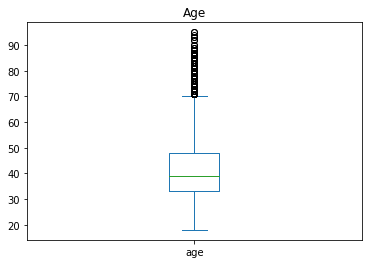

In [70]:
df['age'].plot(kind='box', title='Age')

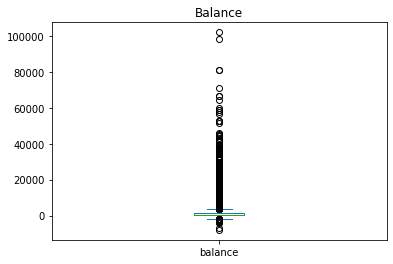

In [71]:
df['balance'].plot(kind='box', title='Balance')

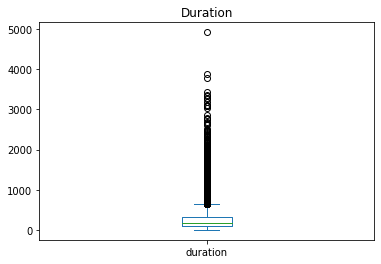

In [72]:
df['duration'].plot(kind='box', title='Duration')

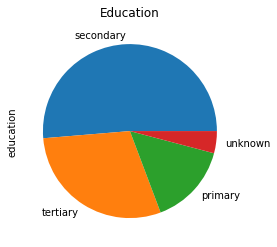

In [73]:
df['education'].value_counts().plot(kind='pie', title='Education')

Al observar esta gráfica, además de ver las probabilidades de cada tipo de educación también observamos que no se se sabe la educaión que tiene una parte de nuestra base de datos, ahora vamos a estudair cuál es ese porcentaje.

In [74]:
df['education'].value_counts()


secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

Ahora, sabemosa parte de los niveles, cuales son las cantidades que están dentro de cada uno de los niveles:


1.   Primaria = 6851   
2.   Secundaria = 23202   
3.   Terciaria = 13301    
4.   Desconocida = 1857

###Cómo lidiar con datos faltantes

Según el proceso CRISP-DM (Cross-Industry Standard Process for Data Mining), las opciones para lidiar con datos faltantes en bases de datos son las siguientes:
1.	Eliminación: Eliminar las filas o columnas con datos faltantes.
2.	Imputación: Reemplazar los valores faltantes con valores estimados o calculados. Por ejemplo, la imputación media o mediana puede ser utilizada para reemplazar los valores faltantes en una columna con el valor promedio o mediana de esa columna.
3.	Interpolación: Interpolar los valores faltantes utilizando una técnica de estimación, como la interpolación lineal o spline.
4.	Modelos predictivos: Utilizar modelos predictivos para estimar los valores faltantes a partir de los datos disponibles.
5.	Algoritmos de aprendizaje no supervisado: Utilizar algoritmos de clustering o de reducción de dimensionalidad para identificar patrones en los datos y utilizarlos para estimar los valores faltantes.
Es importante elegir la técnica adecuada para lidiar con los datos faltantes, considerando el tipo de datos, la cantidad de datos faltantes y su impacto en los resultados de análisis. Es recomendable investigar y evaluar varias opciones antes de tomar una decisión.



Ahora, tenemos que decidir cómo vamos a gestionar aquellos clientes cuyo nivel de educación es desconocido. 

Debido a que nuestro primer problema trata de ilustrar la correlación entre el nivel de educación y el dinero que tienen, es importante que hagamos algo con ellos en mente.

Desconocemos la razón por la cual esta infomación es desconocida, agravado por el hecho de desconocer el criterio usado para agrupar a la gente en dichos niveles. 

¿Tendrán un nivel de educación inferior al requerido para poder haber obtenido el nivel primario? Tal vez no querían divulgar dicha información...



Existen varias opciones respecto a como lidiar con NaN.
Una opción sería ver si podríamos eliminar aquellos clientes con nivel de educación desconocida.

In [75]:
df['education'].value_counts().sum()

45211

In [76]:
print("Porcentage de todos los clientes con nivel de educación desconocido: {:.2f}%".format((1857/45211)*100))

Porcentage de todos los clientes con nivel de educación desconocido: 4.11%


Finalmente, hemos decidimos eliminar los valores ya que el porcentaje es batante bajo, además considerando la cantidad de datos que tenemos podemos eliminarlas. También a feavor de nuestar decisión cabe decir que no nos podemos inventar los estudios de una persona, no sabemos cual es el motivo de no saberlo.

In [77]:
df = df.drop(df[df['education']=='unknown'].index)
df.reset_index(inplace=True, drop=True)

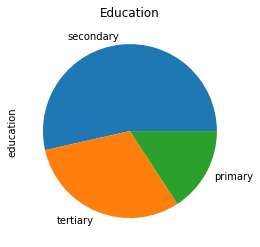

In [78]:
df['education'].value_counts().plot(kind='pie', title='Education')

Como observamos en la gráfica ya no tenemos observaciones en las que no sepamos las educaión de una persona.

In [79]:
df.head()

,age,education,balance,duration
0,58,tertiary,2143,261
1,44,secondary,29,151
2,33,secondary,2,76
3,35,tertiary,231,139
4,28,tertiary,447,217


#EJERCICIO 1

¿Está el nivel de estudios está directamente relacionado con el saldo de cada cliente en la cuenta?

Para ello estableceremos 3 rangos numéricos: los que tienen deudas, la gente que tiene unos ahorros normales (en positivo, pero menos de 10.000 euros) y los que disponen de suficientes ahorros como para ofrecerles paquetes de inversión (aquellos en positivo con más de 10.000 euros). 

In [80]:
filas=len(df.axes[0])

for i in range (filas):
  if df['balance'][i]<0:
    df['balance'][i]='Endeudados'
  elif df['balance'][i]>10000:
    df['balance'][i]='Potencial_Paquete_Inversion'
  else:
    df['balance'][i]='Balance_Positivo'


<ipython-input-80-809ed51097a4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['balance'][i]='Balance_Positivo'
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Ya sabemos que tendremos que agrupar a los clientes en 3 rangos numéricos según el dinero que actualmente tengan en su cuenta de banco, pero previo a visualizar los datos, 

In [81]:
df.head()

,age,education,balance,duration
0,58,tertiary,Balance_Positivo,261
1,44,secondary,Balance_Positivo,151
2,33,secondary,Balance_Positivo,76
3,35,tertiary,Balance_Positivo,139
4,28,tertiary,Balance_Positivo,217


In [82]:
df['balance'].value_counts()

Balance_Positivo               38927
Endeudados                      3638
Potencial_Paquete_Inversion      789
Name: balance, dtype: int64

In [83]:
df['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
Name: education, dtype: int64

In [84]:
grouped = df.groupby(['education','balance'])

In [85]:
counts = grouped['age'].count().reset_index(name='count')
table = counts.pivot_table(index='education',columns='balance', values='count')
table

balance,Balance_Positivo,Endeudados,Potencial_Paquete_Inversion
education,,,
primary,6160,607,84
secondary,20590,2311,301
tertiary,12177,720,404


In [86]:
data = table
print(data)

balance    Balance_Positivo  Endeudados  Potencial_Paquete_Inversion
education                                                           
primary                6160         607                           84
secondary             20590        2311                          301
tertiary              12177         720                          404


Con esta tabla logramos visualizar, previo a una gráfica, toda la información que necesitamos conocer. 

Ésta gráfica nos indica qué nivel de educación posee cada bloque de clientes según el dinero que tienen en la cuenta actualmente.

Analicémosla con detenimiento para comprender bien la información que aparece y si hay algún dato que nos pueda sorprender.

Empecemos por los daros tal vez más esperados.

El mayor número de personas que poseen más de 10.000€ en sus cuentas y por lo tanto pueden ser considerados para el paquete de inversiones son personas con el nivel de educación más alto, y el grupo de personas más pequeño lo componen aquellos con un nivel de educación primaria.

Se puede considerar interesante el hecho que el mayor número de personas endeudadas, o con la cuenta en negativo, provienen de aquellos con nivel de educación secundaria y con un margen muy grande. Un 63.5% de todas las personas endeudadas exactamente. Seguidos después por aquellos con un nivel de educación terciario y en último lugar aquellos con un nivel de educación primaria. Es cierto que aunque el menor número de personas endeudadas provengan del nivel educativo primario, en general son el grupo menos numeroso. Porcentualmente hablando, el número de personas endeudadas es mayor en dicho grupo que en el de aquellos individuos con nivel de educación secundaria.


Seguiremos analizando una vez obtengamos la gráfica




In [87]:
df = pd.DataFrame(data)

In [88]:
print(df)

balance    Balance_Positivo  Endeudados  Potencial_Paquete_Inversion
education                                                           
primary                6160         607                           84
secondary             20590        2311                          301
tertiary              12177         720                          404


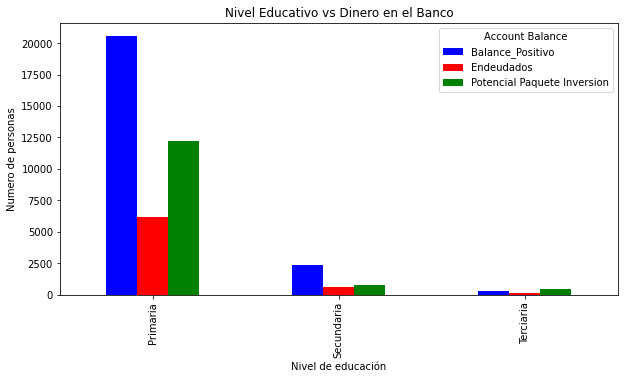

In [102]:

import pandas as pd
import matplotlib.pyplot as plt

# Create the sample data
data = {'Education Level': ['Primaria', 'Secundaria', 'Terciaria', 
                            'Primaria', 'Secundaria', 'Terciaria',
                            'Primaria', 'Secundaria', 'Terciaria'],
        'Account Balance': ['Endeudados', 'Endeudados', 'Endeudados', 
                            'Balance_Positivo', 'Balance_Positivo', 'Balance_Positivo',
                            'Potencial Paquete Inversion', 'Potencial Paquete Inversion', 'Potencial Paquete Inversion'],
        'Count': [6160, 607, 84,
                  20590, 2311, 301,
                  12177, 720, 404]}

# Convert the data into a pandas dataframe
df = pd.DataFrame(data)

# Create a pivot table to rearrange the data
pivot_table = df.pivot(index='Education Level', columns='Account Balance', values='Count')

# Plot the pivot table as a bar chart
pivot_table.plot(kind='bar', stacked=False, figsize=(10, 5), color=['blue', 'red', 'green'])

# Add labels and titles to the plot
plt.xlabel('Nivel de educación')
plt.ylabel('Numero de personas')
plt.title('Nivel Educativo vs Dinero en el Banco')

# Show the plot
plt.show()


**¿Qué diagrama has usado y por qué?**

Optamos por un gráfico de barras adyacentes para representar esta información por una serie de ventajas que presentaba.

Las ventajas de utilizar una gráfica de barras adyacentes para explicar la relación entre el nivel de estudios y el saldo de los clientes en la cuenta incluyen:

*   **Visualización clara:** Las gráficas de barras adyacentes son fáciles de leer y comprender, lo que permite a los lectores ver de manera clara la relación entre dos variables.
*   **Comparación fácil:** Con una gráfica de barras adyacentes, es fácil comparar los valores de dos o más categorías y ver si existe una correlación entre ellas.
*   **Representación gráfica:** Las gráficas de barras adyacentes pueden utilizarse para representar de manera gráfica datos numéricos y hacer que la información sea más accesible para los lectores.


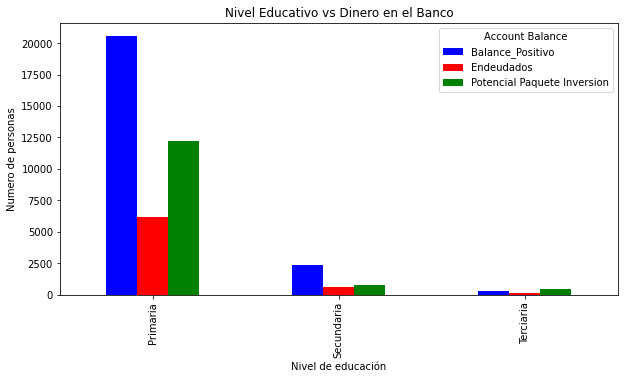

In [103]:
import pandas as pd
import matplotlib.pyplot as plt

# Create the sample data
data = {'Education Level': ['Primaria', 'Secundaria', 'Terciaria', 
                            'Primaria', 'Secundaria', 'Terciaria',
                            'Primaria', 'Secundaria', 'Terciaria'],
        'Account Balance': ['Endeudados', 'Endeudados', 'Endeudados', 
                            'Balance_Positivo', 'Balance_Positivo', 'Balance_Positivo',
                            'Potencial Paquete Inversion', 'Potencial Paquete Inversion', 'Potencial Paquete Inversion'],
        'Count': [6160, 607, 84,
                  20590, 2311, 301,
                  12177, 720, 404]}

# Convert the data into a pandas dataframe
df = pd.DataFrame(data)

# Create a pivot table to rearrange the data
pivot_table = df.pivot(index='Education Level', columns='Account Balance', values='Count')

# Plot the pivot table as a bar chart
pivot_table.plot(kind='bar', stacked=False, figsize=(10, 5), color=['blue', 'red', 'green'])

# Add labels and titles to the plot
plt.xlabel('Nivel de educación')
plt.ylabel('Numero de personas')
plt.title('Nivel Educativo vs Dinero en el Banco')

# Show the plot
plt.show()

¿Cuál es el grupo que más destaca? 

Aporta toda la información que creas necesaria que puedes obtener de la gráfica.

#EJERCICIO 2

En este ejercicio nos piden que dividamos las edades, es decir que pase de ser una variable númerica a que sea una variable categórica. En concreto nosotros vamosa hacer la división de esta manera: los menores de 30 años van a ser alumnos, de 30 a 45 años serán trabajadores jóvenes, de 46 a 65 trabajadores veteranos, y por último los trabajdores no vinculados a la universidad. 

¿Cuál es el grupo de edad que tiene más clientes?


In [ ]:
#Establecemos las diferentes clases que queremos crear.
filas=len(df.axes[0])
for i in range (filas):
    if df['age'][i]<30:
        df['age'][i]='Alumnos'
    elif df['age'][i]>=30 and df['age'][i]<=45:
        df['age'][i]='Trabajadores jóvenes'
    elif df['age'][i]>=46 and df['age'][i]<=65:
        df['age'][i]='Trabajadores veteranos'
    else:
        df['age'][i]='Cliente no vinvulado'


Una vez transformada la variable vamos a compar cuantos tipo de cada hay.

In [ ]:
count = df['age'].value_counts()

Ahora, además de saber cuales son las categorías que hemos creado, sabemos cuantas observaciones pertenercen a cada categoría.

- Alumnos: 5273
- Trabajadores jóvenes: 25490
- Trabajadores veteranos: 13697
- Cliente no vinculado: 751

Al visualizar estos datos se nos hace raro pensar que en un banco situado dentro de la universidad donde la mayoría de las personas que pasan por delente sean alumnos, que sea la segunda categoría con menos frecuencia.

In [ ]:
df['age'].value_counts().plot(kind='pie', title='Edad en categorías')

Observamos que hay bastantes más valores de trabajadores jóvenes, seguido de trabajadores veteranos.

#EJERCICIO 3

En este ejercicio lo que queremos hacer es ver la duración de los clientes del banco Santander en la sucursal de la UFV. Para eso lo que vamos a hacer es pasar los días a años y una vez en año vamos a graficarlo para ver que tipo de clientes son los que tiene esta sucursal.

In [ ]:
#Convertimos la columna duration a float 
#para que la operación salga con decimales
df['duration'] = df['duration'].astype (float)
filas=len(df.axes[0])
for i in range(filas):
  df['duration'][i] = df['duration'][i]/365.25

Una vez en decimales lo graficamos.

In [ ]:
df['duration'].plot(title='Años en la empresa')

#INTENTAR TRASPONERLA

In [ ]:
df